In [107]:
#import all necessary modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [108]:
#Read the dataset
Leads=pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
#Check the Shape of the dataset
Leads.shape

(9240, 37)

In [110]:
#check the dataset information
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [111]:
#describe the dataset
Leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Explotary Data Analysis

In [112]:
# check the duplicate data in the dataset
print(sum(Leads.duplicated(subset = 'Prospect ID')) == 0)
print(sum(Leads.duplicated(subset = 'Lead Number')) == 0)

True
True


**we now know that there is no duplicate value in the dataset**

In [113]:
# we can drop Prospect Id and Lead Number column beacuse they are just unique number columns which is not helpul for analysis
Leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [114]:
# we have so many values which are just empty so will change it to NaaN for ease of analysis
Leads = Leads.replace('Select', np.nan)

In [115]:
# check the null values in the each column
Leads.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [116]:
#Check the null value percentage in each column
round(100*(Leads.isna().sum()/len(Leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [117]:
# drop the columns which has the null percentage more than 45%
C = Leads.columns
for i in C:
    if((100*(Leads[i].isnull().sum()/len(Leads.index))) >= 45):
        Leads.drop(i,axis=1,inplace=True)

In [118]:
# check the null percentage after the column drop
round(100*(Leads.isna().sum()/len(Leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Attribute Analysis

In [119]:
Leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [120]:
def Uplot(i):
    plt.figure(figsize=(15,5))
    s = sb.countplot(x=Leads[i])
    s.set_xticklabels(s.get_xticklabels(),rotation=60)
    plt.show()

In [121]:
def plot(i):
    plt.figure(figsize=(15,5))
    s = sb.countplot(x=Leads[i],hue=Leads.Converted)
    s.set_xticklabels(s.get_xticklabels(),rotation=60)
    plt.show()

In [122]:
#CHECKING the column which has highest null values
Leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [123]:
# As we can see that empty values has most counts and mumbai has the second most majority of the values counts so we can merge both
Leads['City'] = Leads['City'].replace(np.nan,'Mumbai')

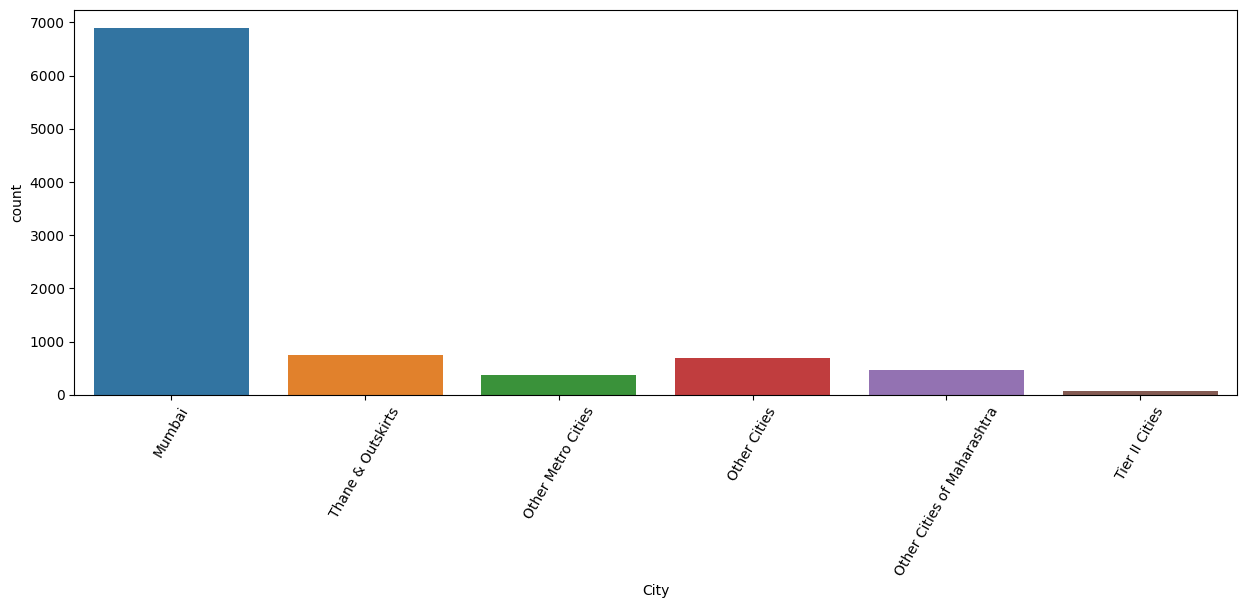

In [124]:
#Lets plot the countplot for the better analysis
Uplot('City')

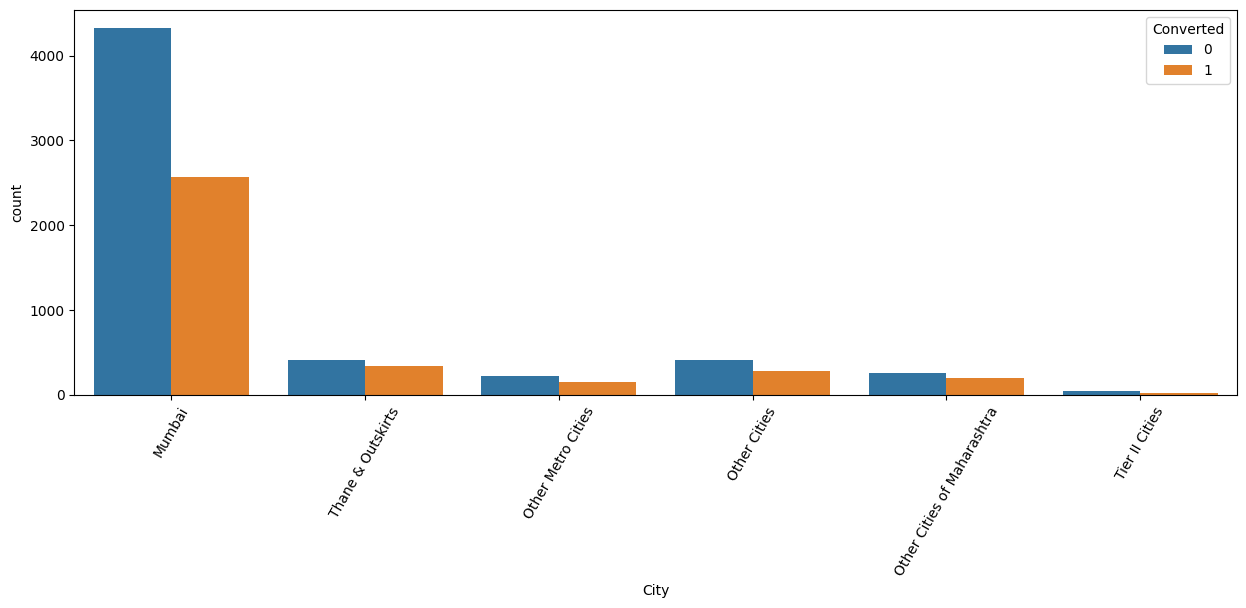

In [125]:
plot('City')

**As we can see the Mumbai city has the Highest Lead Conversion**

In [126]:
#Check the Specialization Colim for null values
Leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [127]:
#As we can see there is large number of not specified Specialization so we rename the NaN as Non Specified 
Leads['Specialization']=Leads['Specialization'].replace(np.nan,'Not Specified')

In [128]:
#As we can see there are many management related Specialization present which have similar tendency so we can merge them all
Leads['Specialization']=Leads['Specialization'].replace(['Finance Management','Hospitality Management','Healthcare Management ',
                                                        'Supply Chain Management','IT Projects Management','Operations Management',
                                                        'Marketing Management','Human Resource Management '],'Management')

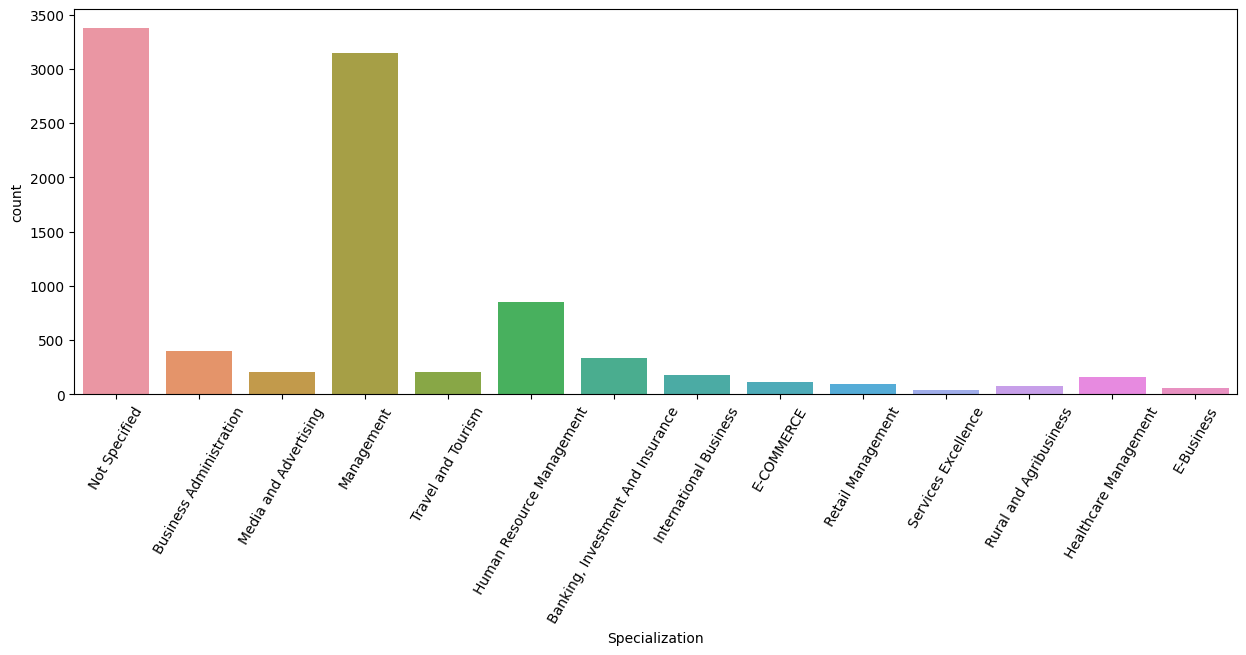

In [129]:
#Lets plot the countplot for the better analysis
Uplot('Specialization')

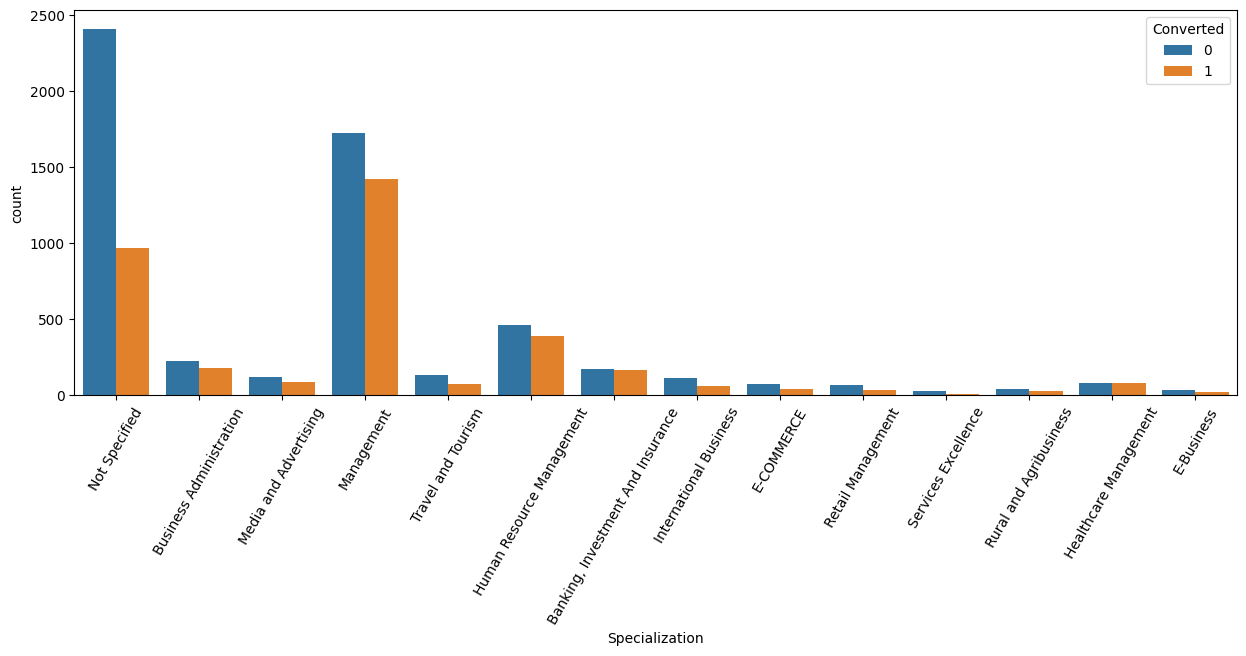

In [130]:
#Lets plot the countplot for the better analysis
plot('Specialization')

**As we can see Management has highest Leads conversation and High number of Leads are generated where specialization is not specified**

In [131]:
# Lets Check the empty values in the Tags  column
Leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [132]:
#Replace the Nan with No Action 
Leads['Tags']=Leads['Tags'].replace(np.nan,'No Action')

In [133]:
#Replace the Low frequency values with other and merge them all
threshold = 200  # Set the threshold for low-frequency values
LFV = Leads['Tags'].value_counts()[Leads['Tags'].value_counts() < threshold].index
#Replacing the Low frequency valuies
Leads['Tags'] = Leads['Tags'].replace(LFV, 'Other Tags')

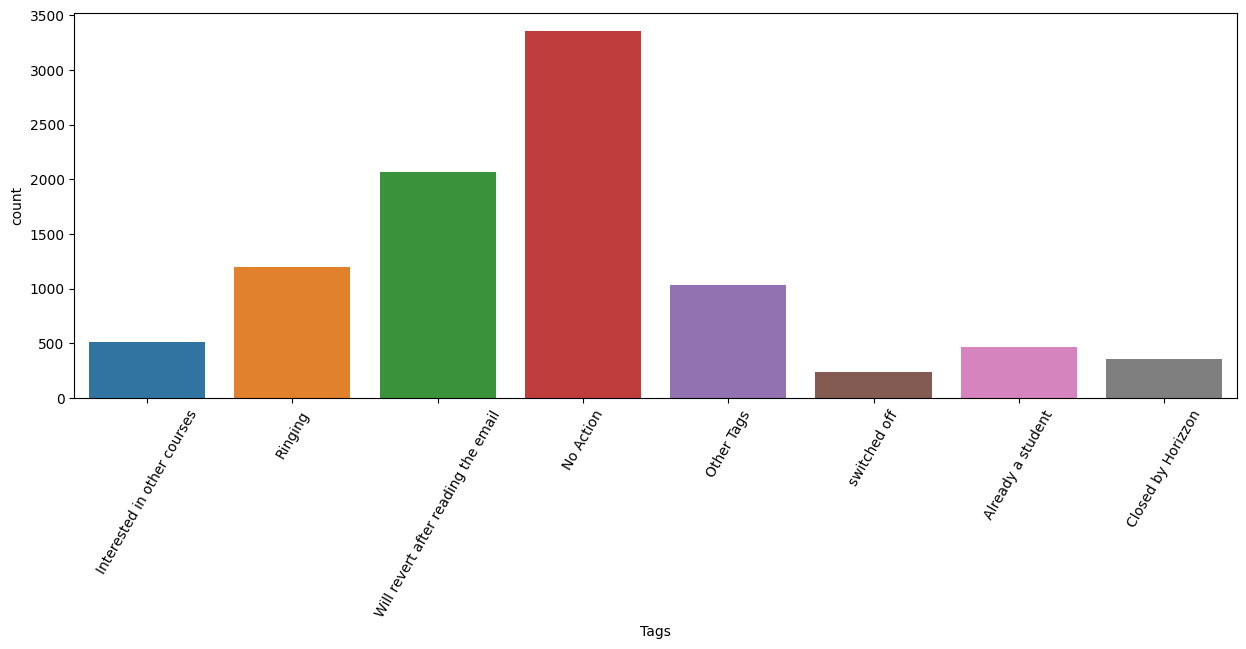

In [134]:
#Plot the countplot for better analysis
Uplot('Tags')

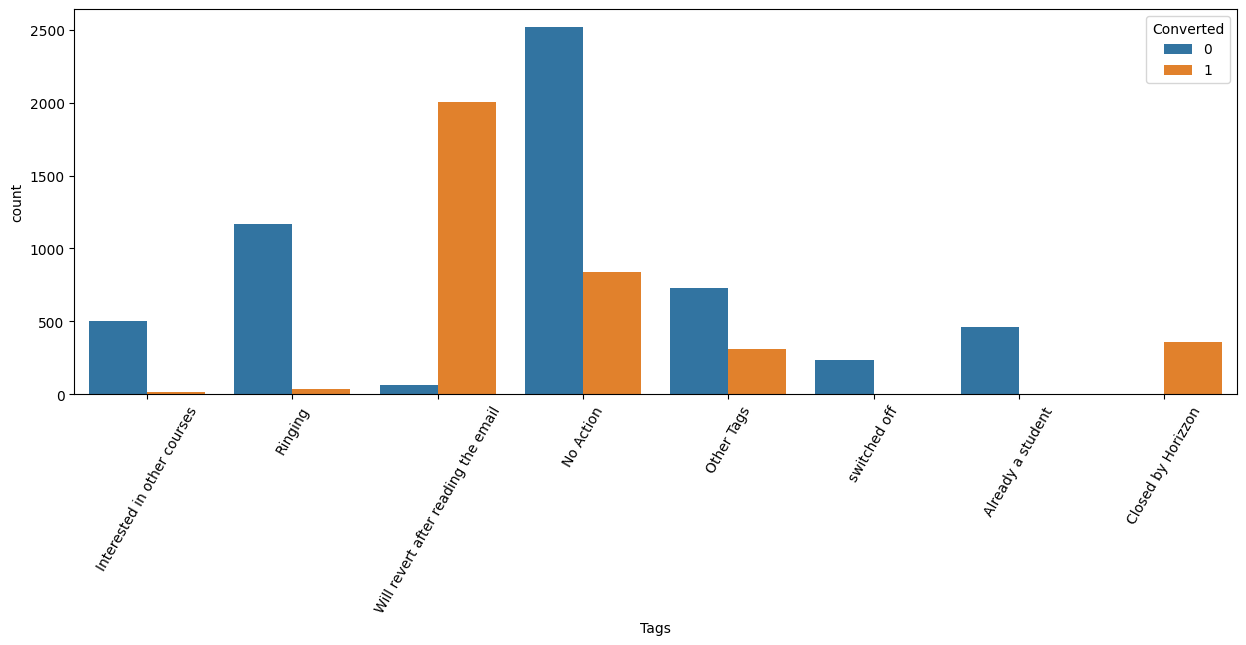

In [135]:
#Plot the countplot for better analysis
plot('Tags')

**We can conclude from the above plot is:**
1) Highest number of Leads are tagged as No Action
2) Highest number of converted Leads are Tagged as will revert after reading the mail
3) Closed by Horizzon tags have high percentage of Lead conversition

In [136]:
#lets check 'What matters most to you in choosing a course' column for null values
Leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

**As we can see there more than 90% of the values are same and it will not help in our analysis so we can drop this column**

In [137]:
#Droping the What matters most to you in choosing a course column because it is not useful
Leads.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [138]:
#Lets check "What is your current occupation" column
Leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [139]:
#Lets Replace Nan value with unemployed because it has high valuecount
Leads['What is your current occupation']=Leads['What is your current occupation'].replace(np.nan,'Unemployed')

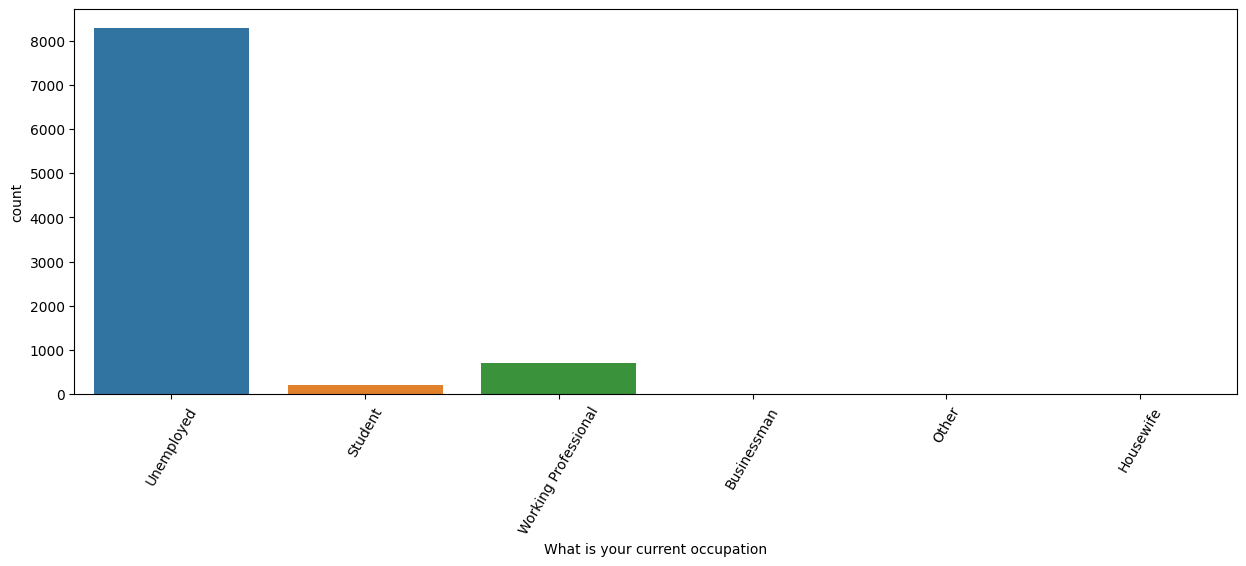

In [140]:
#Plot the countplot for better analysis
Uplot('What is your current occupation')

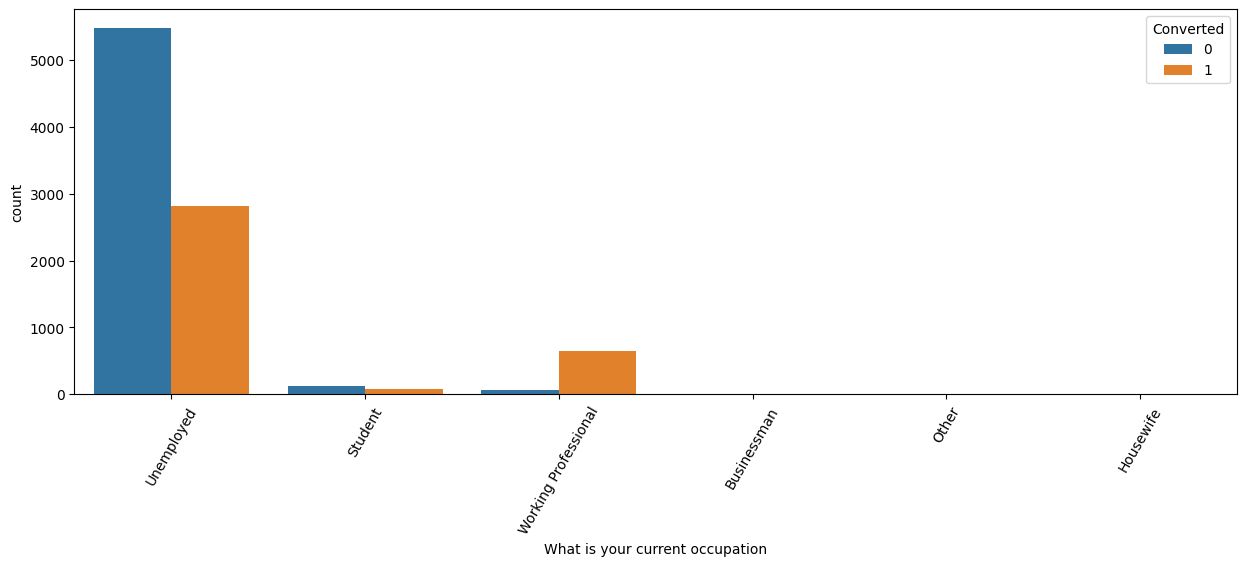

In [141]:
#Plot the countplot for better analysis
plot('What is your current occupation')

**As we can see here Unemployed value has more number of value counts in the column but Working Professional has the high Lead conversation ratio and it is one of the important column so we can't drop this column** 

In [142]:
#Lets check Country column
Leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [143]:
#As we can see Nan has high value so we can replace this with India
Leads['Country']=Leads['Country'].replace(np.nan,'India')

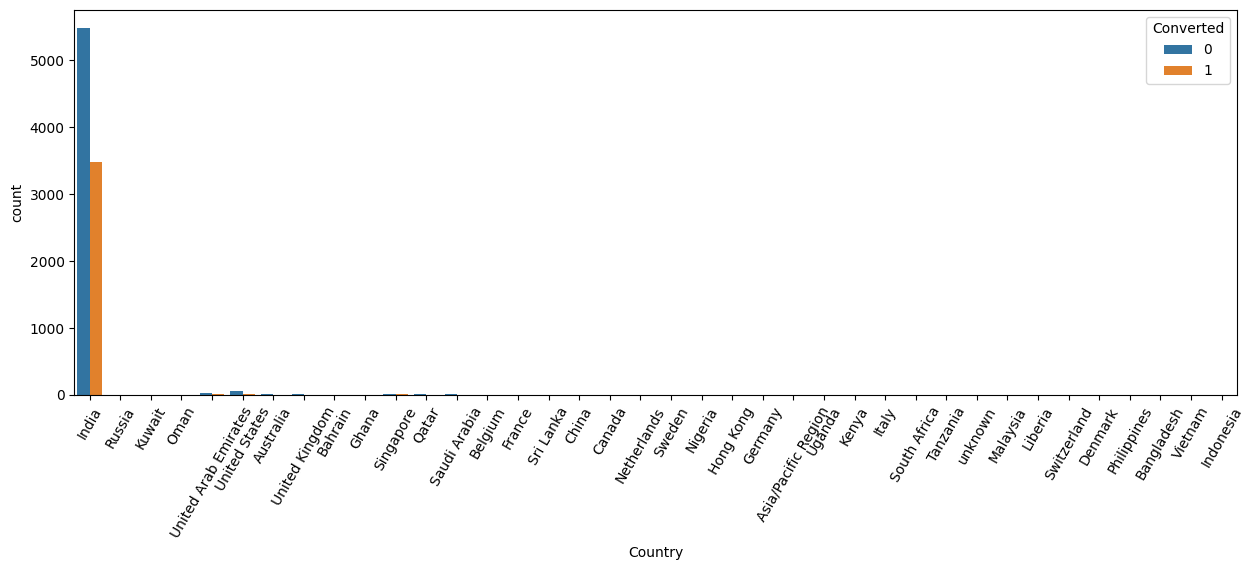

In [144]:
#Plot the countplot for better analysis
plot('Country')

**As we can see India has almost 90% of total value count in the Column because of this it will not be helpfull in the Analysis so we can drop this column**

In [145]:
#Drop the country column
Leads.drop('Country',axis=1,inplace=True)

In [146]:
#lets Check the Last Activity Column
Leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [147]:
# As we can see Nan has high value so we can replace it with Other Activities
Leads['Last Activity']=Leads['Last Activity'].replace(np.nan,'Other Activity')

In [148]:
#check which all are values has low frequency and merge them all
threshold = 110  # Set the threshold for low-frequency values
LFV = Leads['Last Activity'].value_counts()[Leads['Last Activity'].value_counts() < threshold].index
#Replace the low frequency values with Other Activities
Leads['Last Activity'] = Leads['Last Activity'].replace(LFV, 'Other Activities')

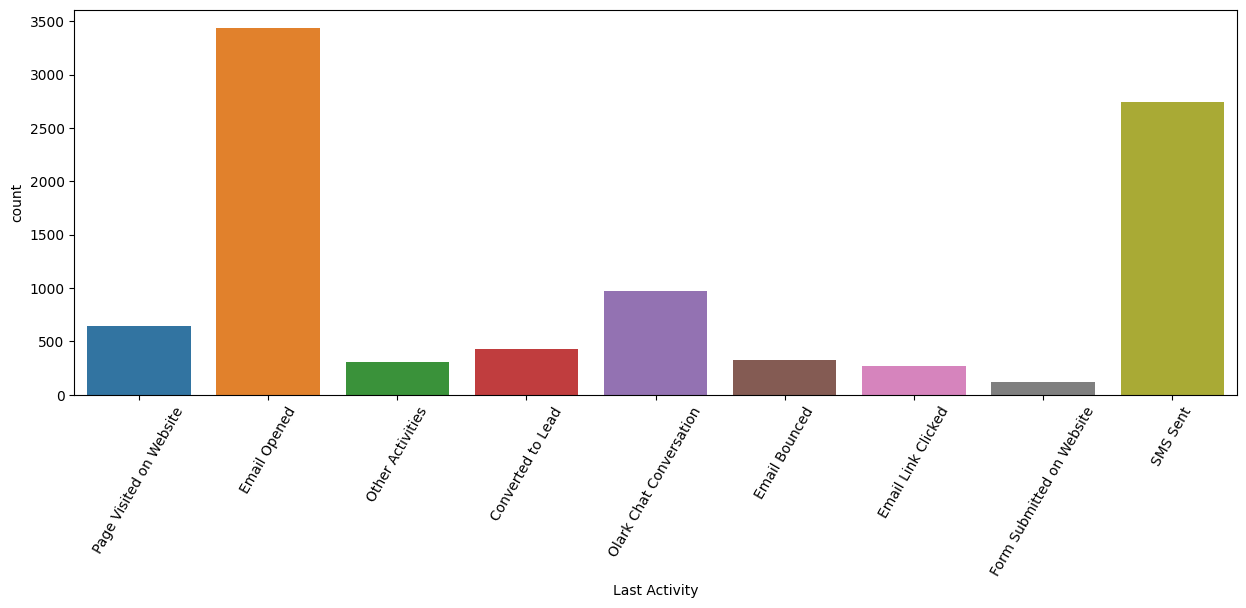

In [149]:
#Plot the countplot for better analysis
Uplot('Last Activity')

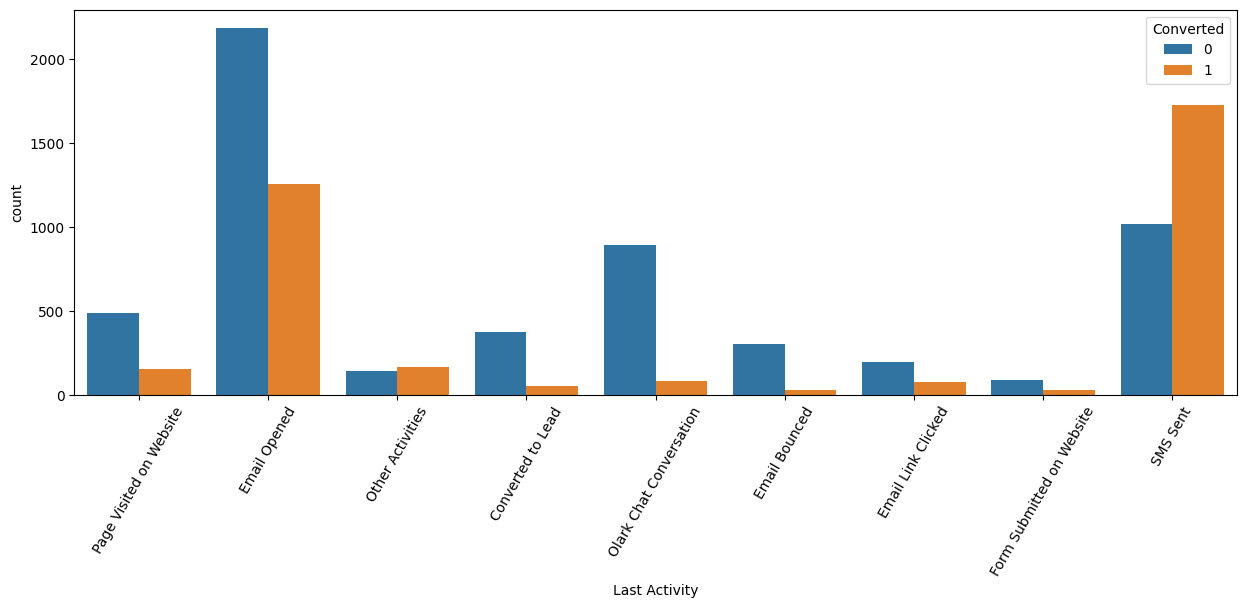

In [150]:
#Plot the countplot for better analysis
plot('Last Activity')

**As we can see when the Last Activity is SMS Sent then it has high Lead converstion and Email Opened has high Value count**

In [151]:
Leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [152]:
#we have replace the nan values with other
Leads['Lead Source']=Leads['Lead Source'].replace(np.nan,'other')

In [153]:
#We have same names with different spelling so we just replace them with correct value
Leads['Lead Source']=Leads['Lead Source'].replace('google','Google')
Leads['Lead Source']=Leads['Lead Source'].replace('Social Media','Facebook')
#As we can see there are many low frequency value we can combine them
threshold = 50  # Set the threshold for low-frequency values
LFV = Leads['Lead Source'].value_counts()[Leads['Lead Source'].value_counts() < threshold].index
#replace the low frequency values with Other source
Leads['Lead Source'] = Leads['Lead Source'].replace(LFV, 'Other Source')

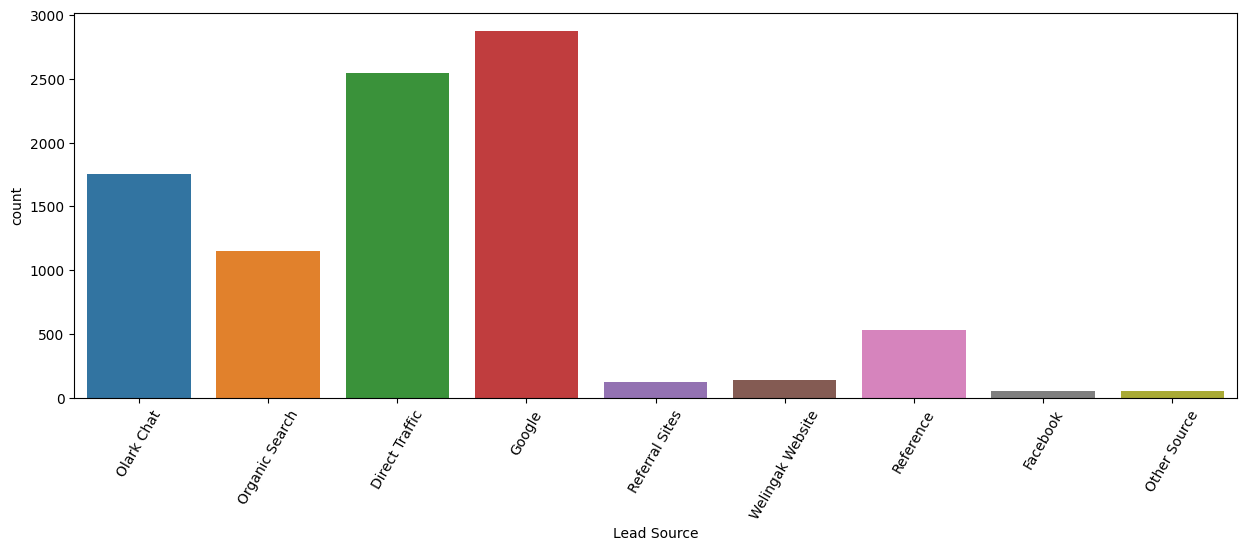

In [154]:
#plot the countplot for better analysis
Uplot('Lead Source')

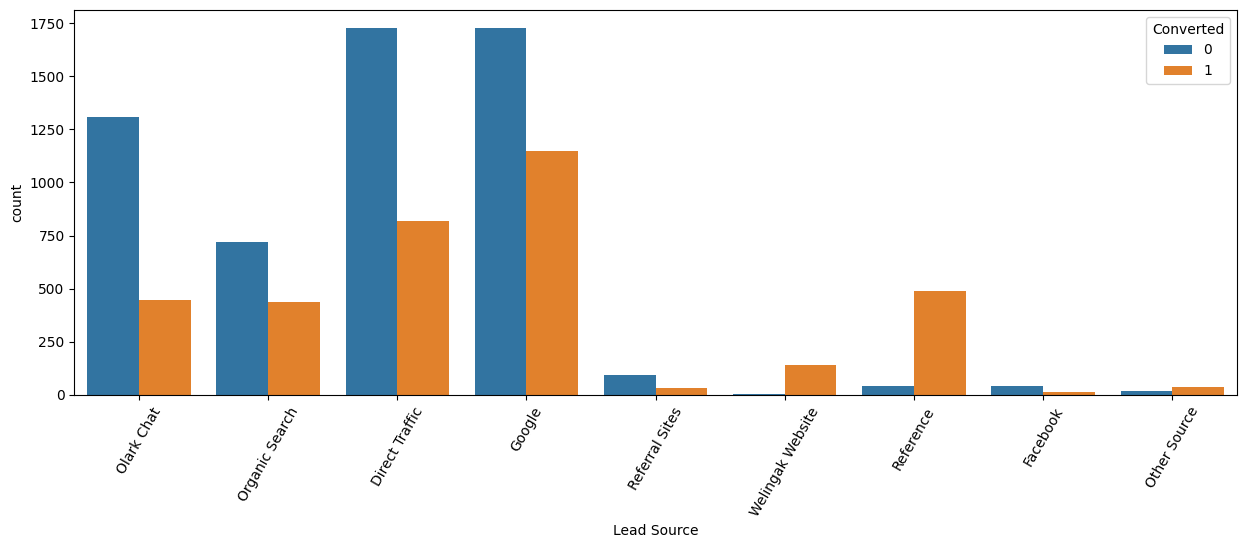

In [155]:
#plot the countplot for better analysis
plot('Lead Source')

**As we can see from the above graph we can conclude that:**
1) Most number of Leads are comming from Google and Direct Traffic
2) Reference has the highest Percentage of Lead conversion 
3) Highest number of converted Leads are comming from Google

In [156]:
#Lets Check the Null Percentage once again because we checked all the columns which contains high values
round(100*(Leads.isna().sum()/len(Leads.index)),2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

**We can see that all columns are having less than 2% null values which is good for analysis**

In [157]:
#Drop the null values
Leads =Leads.dropna()

In [158]:
#Lets Check the Null Percentage once again
round(100*(Leads.isna().sum()/len(Leads.index)),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

In [159]:
#Lets check Lead Origin Column
Leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

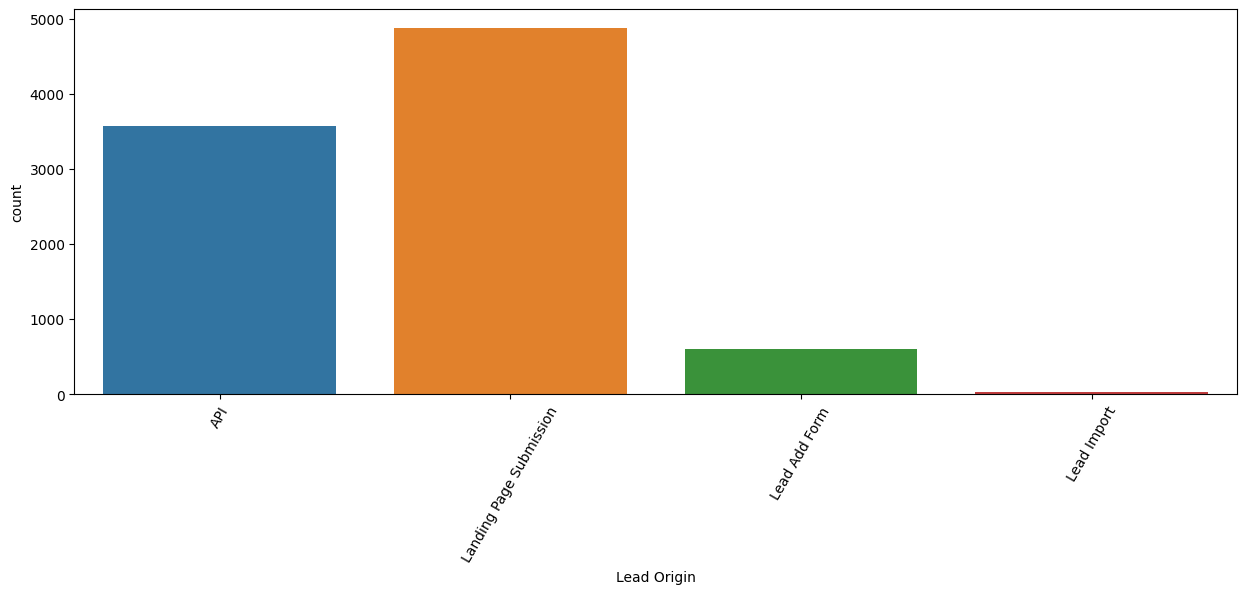

In [160]:
#plot the countplot for better analysis
Uplot('Lead Origin')

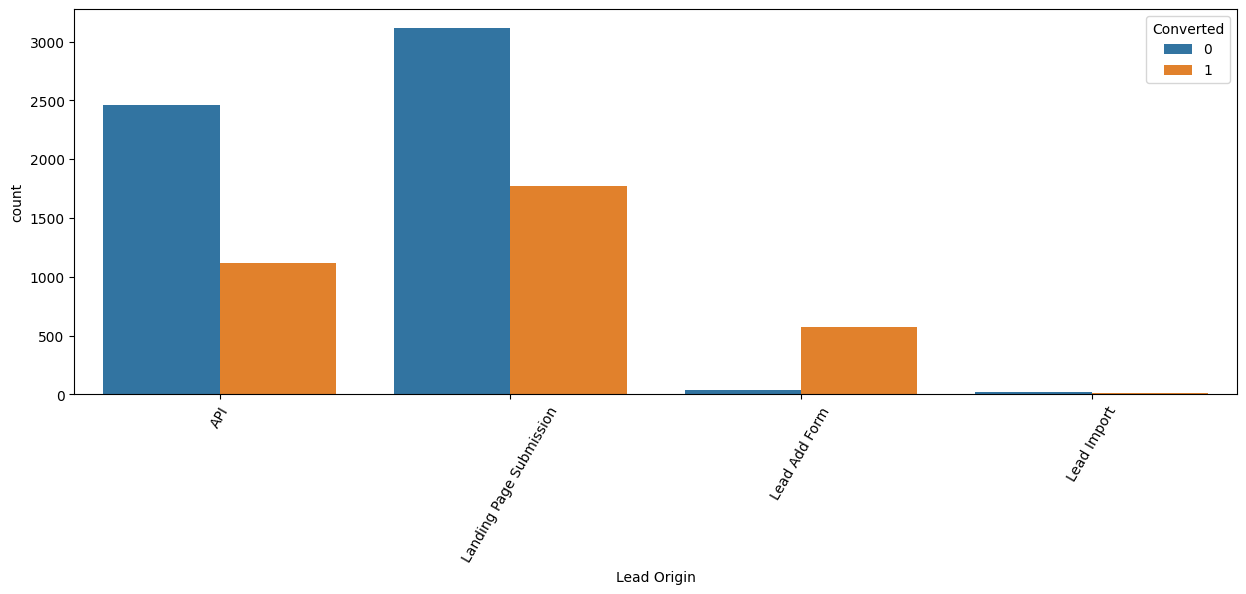

In [161]:
#plot the countplot for better analysis
plot('Lead Origin')

**As we can conclude from the above graph is :**
1) Highest number of Leads are comming from Landing Page Submission and API
2) Lead Add Form has highest percentage of Lead Conversion
3) In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [162]:
#Lets check Last Notable Activity column
Leads['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [163]:
#Replace all the low frequence values to Other Activities
threshold = 100  # Set the threshold for low-frequency values
LFV = Leads['Last Notable Activity'].value_counts()[Leads['Last Notable Activity'].value_counts() < threshold].index
Leads['Last Notable Activity'] = Leads['Last Notable Activity'].replace(LFV, 'Other Activity')


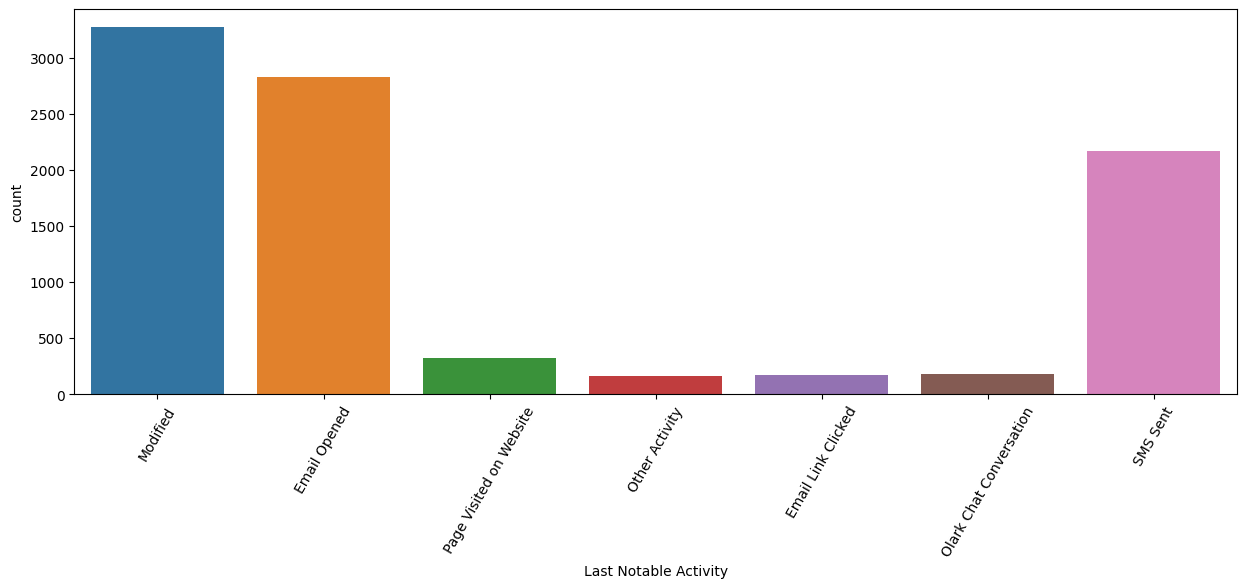

In [164]:
#plot countplot for better analysis
Uplot('Last Notable Activity')

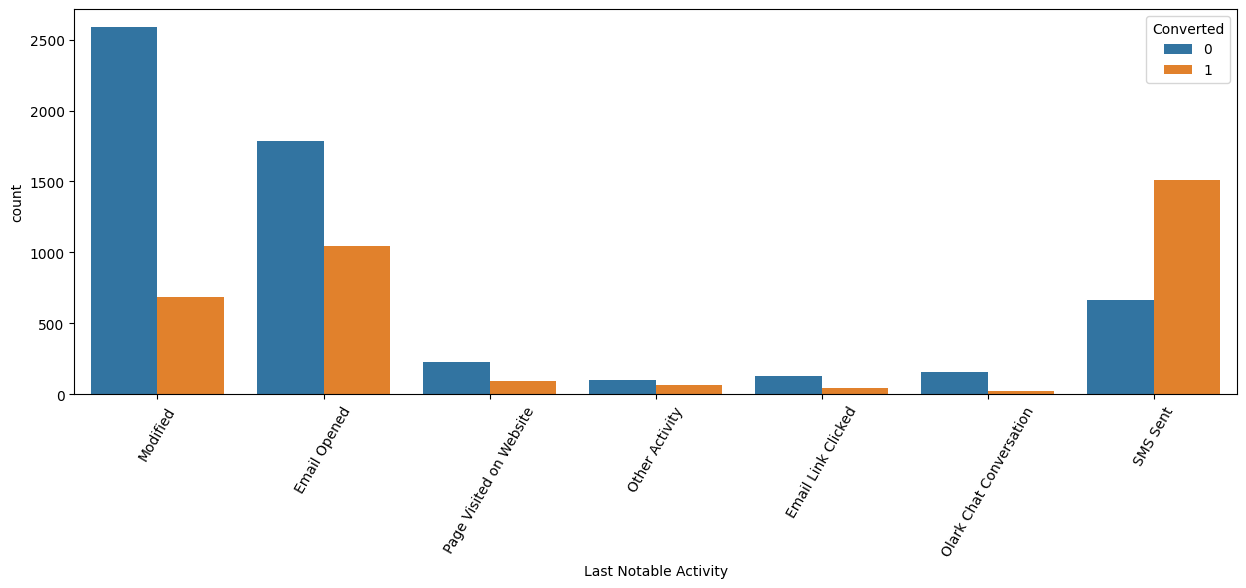

In [165]:
#plot countplot for better analysis
plot('Last Notable Activity')

**We can conclude from the above plot is:**
1) When Last Notable Action in SMS sent then Lead conversition is high
2) Highest number of Leads last notable action is modified or email opened

In [166]:
#Lets check which are all the the binary columns
Yes_No_Columns = []
for c in Leads.columns:
    if 'Yes' in Leads[c].unique() or 'No' in Leads[c].unique():
        Yes_No_Columns.append(c)
print(Yes_No_Columns)

['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


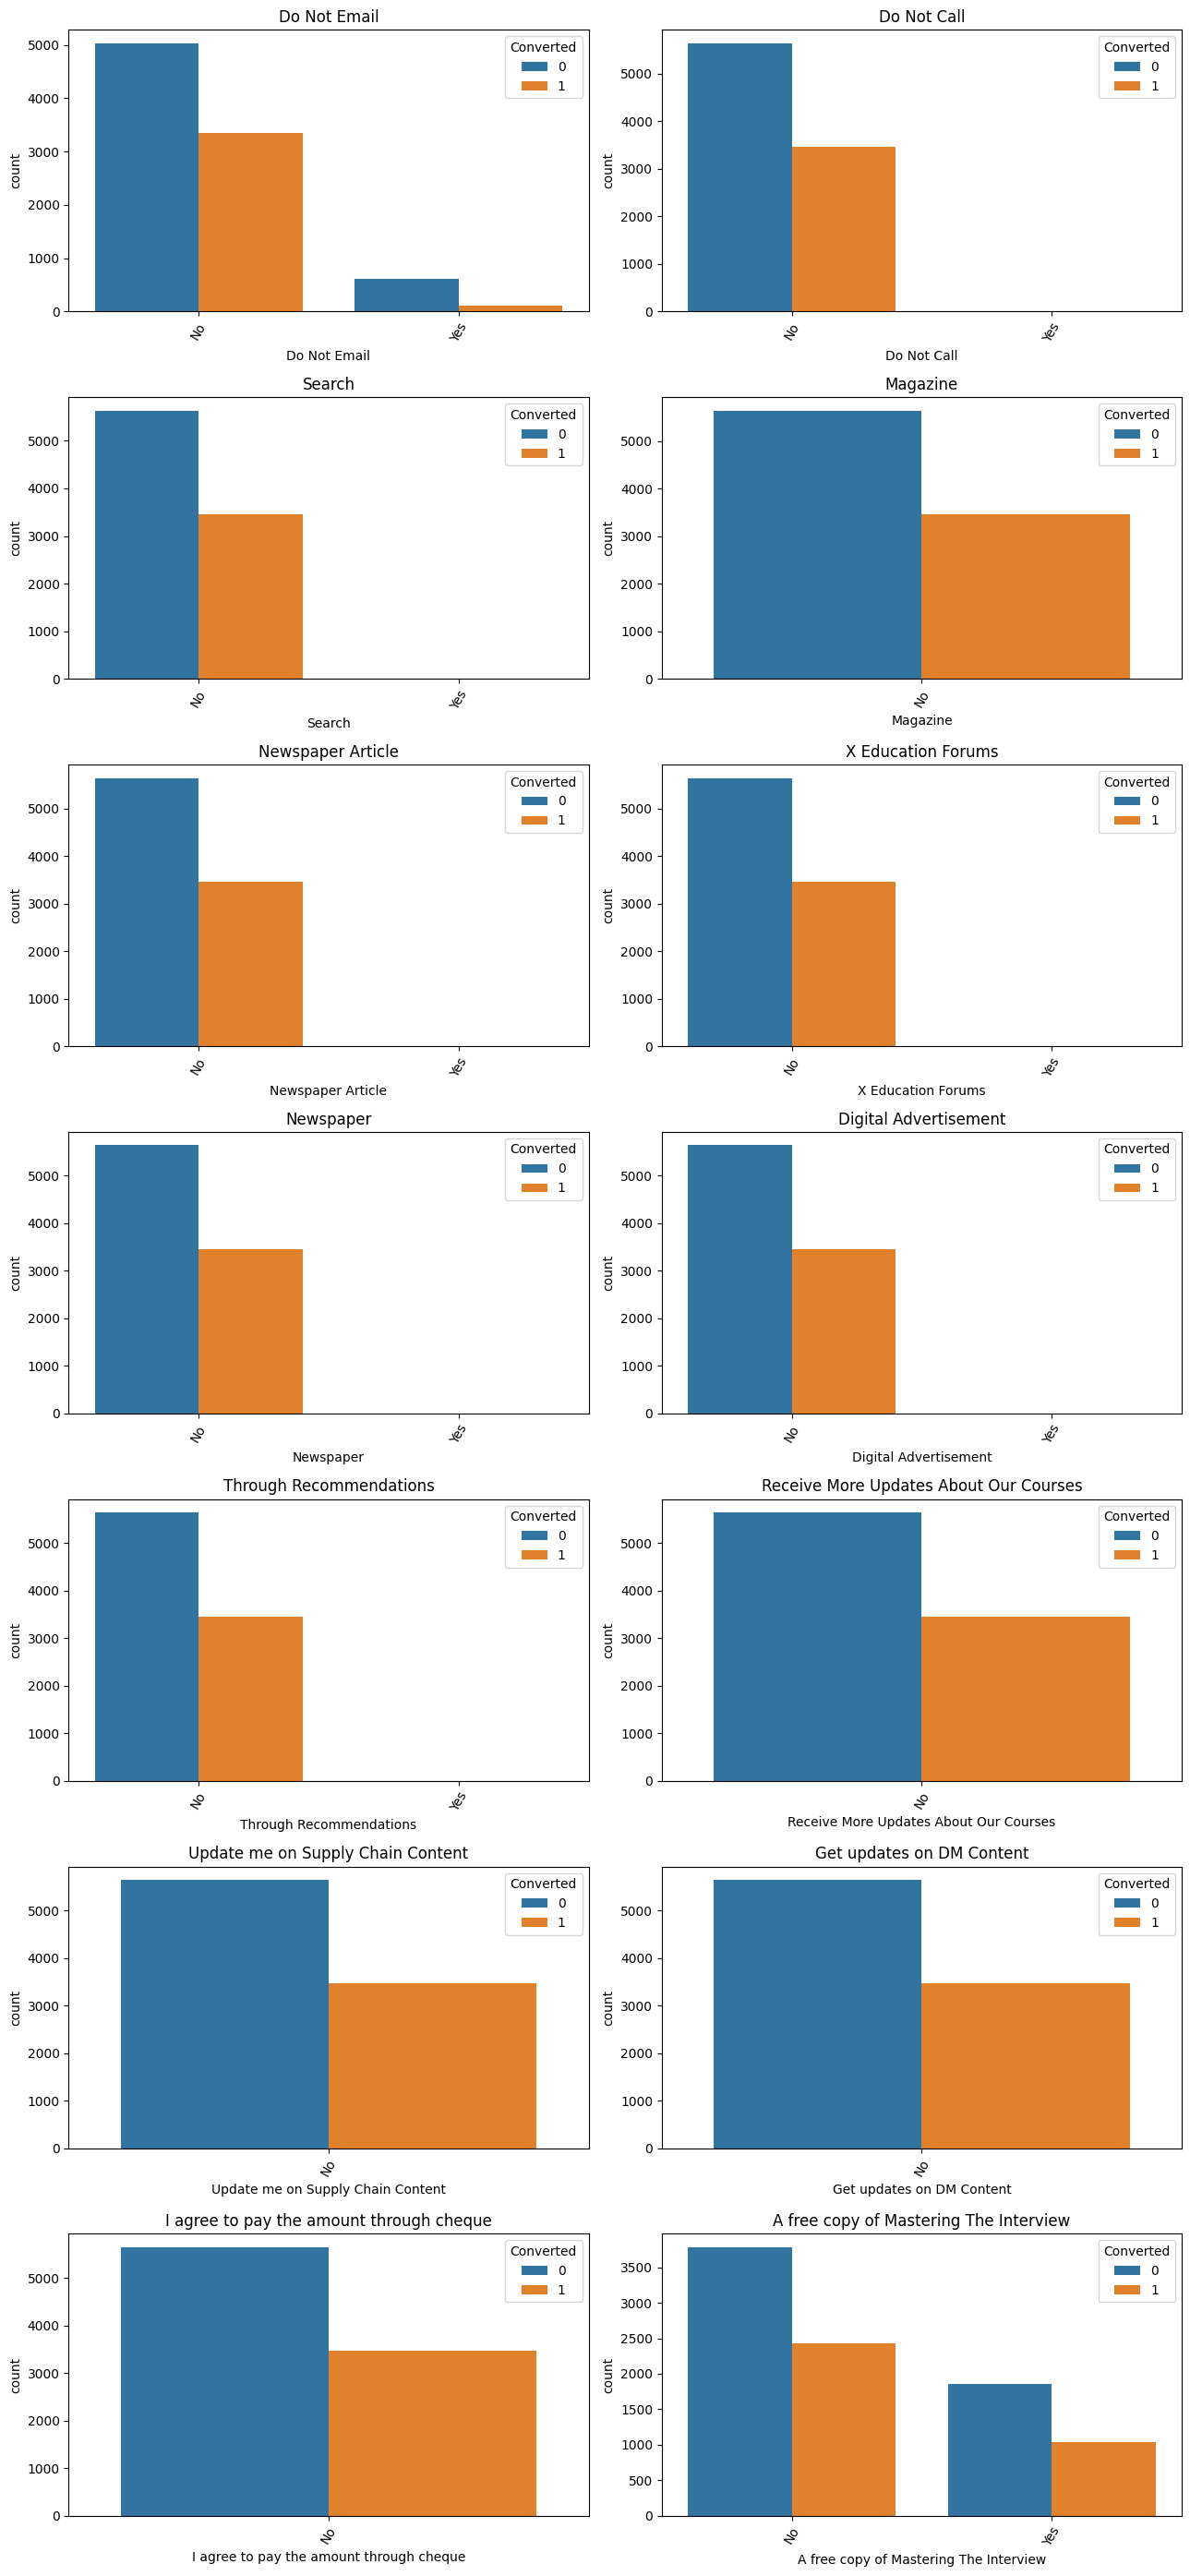

In [167]:
#plot the countplot for the binary columns
n = len(Yes_No_Columns)  # Number of columns to plot
r = (n + 1) // 2  # Number of rows needed to accommodate all columns
fig, axes = plt.subplots(r, 2, figsize=(13, 4*r))
for i, c in enumerate(Yes_No_Columns):
    s = axes[i // 2, i % 2] if r > 1 else axes[i % 2]
    sb.countplot(x=Leads[c], hue=Leads.Converted, ax=s)
    s.set_xticklabels(s.get_xticklabels(), rotation=60)
    s.set_title(c)
plt.tight_layout()
plt.show()

**We can see that many columns have single value has more than 95% of valuecounts**

In [168]:
#Check binary columns where single value has more than 95% value counts
Drop_Columns = []
for i in Yes_No_Columns:
    if 'Yes' in Leads[i].unique() and 'No' in Leads[c].unique():   
        vc = Leads[i].value_counts()
        percentage_yes = (vc['Yes'] / len(Leads[i])) * 100
        percentage_no = (vc['No'] / len(Leads[i])) * 100
        if percentage_yes > 95:
            Drop_Columns.append(i)
        elif percentage_no > 95:
            Drop_Columns.append(i)
    elif 'Yes' in Leads[i].unique() :   
        vc = Leads[i].value_counts()
        percentage_yes = (vc['Yes'] / len(Leads[i])) * 100       
        if percentage_yes > 95:
            Drop_Columns.append(i)
    elif 'No' in Leads[i].unique() :   
        vc = Leads[i].value_counts()
        percentage_yes = (vc['No'] / len(Leads[i])) * 100       
        if percentage_yes > 95:
            Drop_Columns.append(i)       
print(Drop_Columns)

['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


**We can drop these asymetrical columns because these are not helpfull in our assignment**

In [169]:
Leads.drop(Drop_Columns,axis=1,inplace=True)

In [170]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

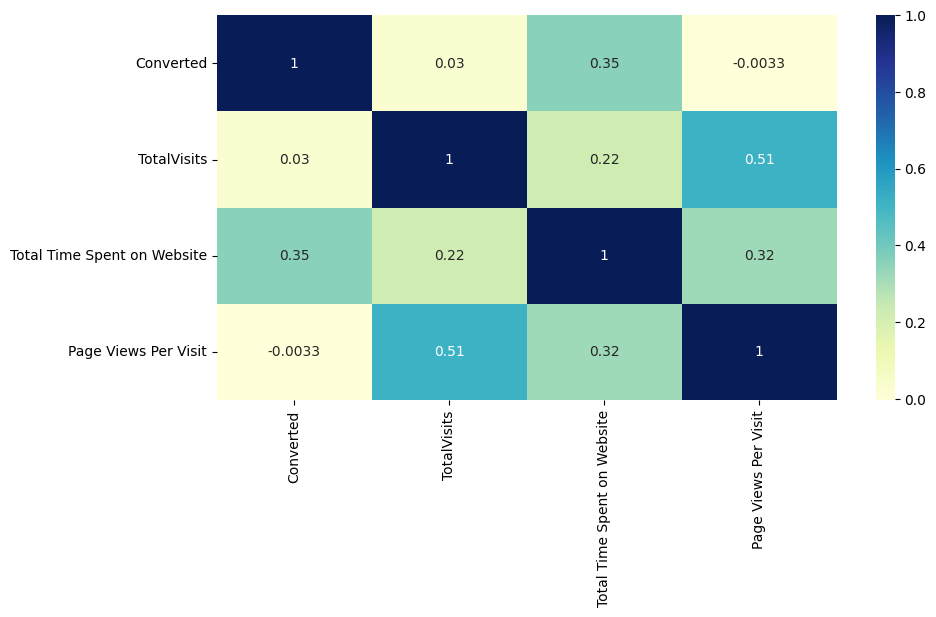

In [171]:
#Now Lets check Numarical Data 
#Plot a Heatmap to understand corelation between
plt.figure(figsize=(10,5))
sb.heatmap(Leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

**As we can see in this plot Total time spent on website has highest corelation with the Converted means if user spent high time on website there is high chance that Lead may be converted**

In [172]:
# Select numerical columns excluding 'Converted'
N_columns = Leads.select_dtypes(include=['int64', 'float64']).columns.drop('Converted')
# Print the numerical columns
print(N_columns)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')


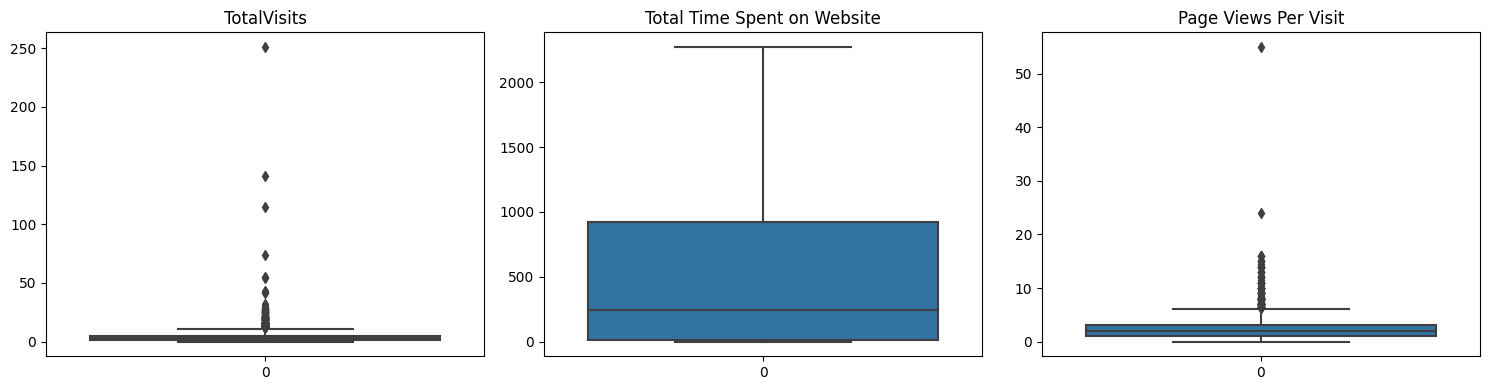

In [173]:
#Lets check the Outliers presence in these columns
fig, axes = plt.subplots(nrows=1, ncols=len(N_columns), figsize=(15,4))
# Draw box plots for each numerical column
for i, c in enumerate(N_columns):
    s = axes[i]  
    sb.boxplot(Leads[c],ax=s)  
    s.set_title(c)  
plt.tight_layout()  
plt.show()

**We can see that Total Visits and Page Views Per Visits columns has outliers in it**

TotalVisits
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64


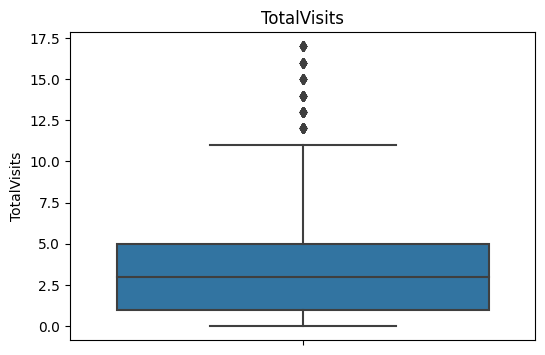

Page Views Per Visit
count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64


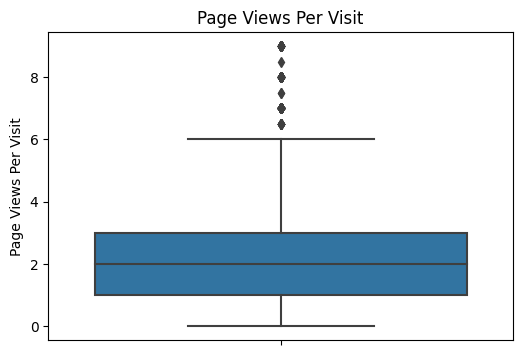

In [174]:
#Lets drop the Total Time Spent on Website column from the N_Columns
NC=N_columns.drop('Total Time Spent on Website')
#Lets check the percentile of these columns
for i in NC:
    print("\033[1m" + i + "\033[0m")
    print(Leads[i].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99]))
    #Outlier Treatment: Remove top & bottom 1% of the Column Outlier values and Plot the boxplotg
    Q3 = Leads[i].quantile(0.99)
    Leads = Leads[(Leads[i] <= Q3)]
    Q1 = Leads[i].quantile(0.01)
    Leads = Leads[(Leads[i] >= Q1)]
    #Plot the boxplot
    plt.figure(figsize=(6, 4))
    s = sb.boxplot(y=Leads[i])
    s.set_title(i)
    plt.show()

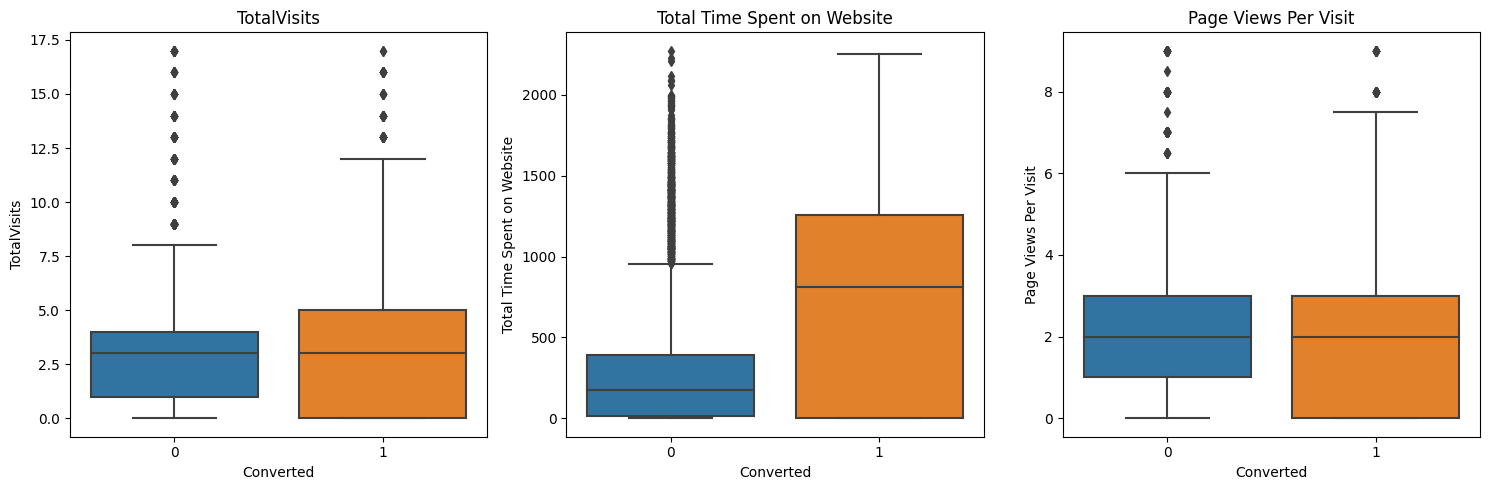

In [175]:
#Lets check the spread of numeric variable columns vs converted column
fig, axes = plt.subplots(nrows=1, ncols=len(N_columns), figsize=(15,5))
# Draw box plots for each numerical column
for i, c in enumerate(N_columns):
    s = axes[i]  
    sb.boxplot(y = Leads[c], x = Leads.Converted,ax=s)  
    s.set_title(c)  
plt.tight_layout()  
plt.show()

**We can conclude from the above plot:**
1) Median for Converted and not Converted Leads in Total Visits and PageViews Per Visist is closer because of that we cant come
    conclussion on these columns
2) when Total time spend on the website increase the chance of Lead conversition


## CREATE DUMMY VARIABLES FOR TEST AND TRAIN DATA

In [176]:
#getting a list of categorical columns
C_columns= Leads.select_dtypes(include=['object']).columns
C_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [177]:
#Lets check which are all the the binary columns
Binary_Columns = []
for c in Leads.columns:
    if 'Yes' in Leads[c].unique() or 'No' in Leads[c].unique():
        Binary_Columns.append(c)
#Lets map the binary columns for better analysis
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
Leads[Binary_Columns] = Leads[Binary_Columns].apply(binary_map)

In [178]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(Leads[['Lead Origin','What is your current occupation','City']], drop_first=True)
Leads = pd.concat([Leads,dummy],axis=1)

In [179]:
#Creating dummy and droping the less relavent value 
s_dummy = pd.get_dummies(Leads['Specialization'], prefix  = 'Specialization').drop(['Specialization_Not Specified'], axis=1)
Leads = pd.concat([Leads, s_dummy], axis = 1)
t_dummy = pd.get_dummies(Leads['Tags'], prefix  = 'Tags').drop(['Tags_No Action'], axis=1)
Leads = pd.concat([Leads, t_dummy], axis = 1)
la_dummy = pd.get_dummies(Leads['Last Activity'], prefix  = 'Last Activity').drop(['Last Activity_Other Activities'], axis=1)
Leads = pd.concat([Leads, la_dummy], axis = 1)
ls_dummy = pd.get_dummies(Leads['Lead Source'], prefix  = 'Lead Source').drop(['Lead Source_Other Source'], axis=1)
Leads = pd.concat([Leads, ls_dummy], axis = 1)
lna_dummy = pd.get_dummies(Leads['Last Notable Activity'], prefix  = 'Last Notable Activity').drop(['Last Notable Activity_Other Activity'], axis=1)
Leads = pd.concat([Leads, lna_dummy], axis = 1)

In [180]:
#drop the original columns
Leads.drop(C_columns,axis=1,inplace=True)

In [181]:
Leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Create Test and Train Dataset

In [182]:
#Create a dataset based on converted as targeted column
from sklearn.model_selection import train_test_split
# Putting target variable to y
y = Leads['Converted']
y.head()
#droping the converted from main dataset
X=Leads.drop('Converted',1)


In [183]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [234]:
print(X_train.shape)
X_train.info()

(6267, 58)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   float64
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student     

### Scaling the Numeric Data

In [185]:
#scaling numeric columns
scaler = StandardScaler()
Num_columns=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[Num_columns] = scaler.fit_transform(X_train[Num_columns])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [186]:
#Checking overall Lead conversation ratio
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

37.92025019546521

**We have overall 38% Lead conversation** 

### Model Building

In [187]:
import statsmodels.api as sm
# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6208
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1340.5
Date:                Tue, 23 May 2023   Deviance:                       2681.1
Time:                        09:39:36   Pearson chi2:                 8.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2312      1.982      0.117      0.907      -3.653       4.116
TotalVisits                                              0.3094      0.072      4.303      0.000       0.168       0.450
Total Time Spent on Website                              1.1166      0.059     18.877      0.000       1.001       1.233
Page Views Per Visit                                    -0.4032      0.089     -4.512      0.000      -0.578      -0.228
Lead Origin_Landing Page Submission                     -0.5265      0.215     -2.444      0.015      -0.949      -0.104
Lead Origin_Lead Add Form                                1.3920      1.138      1.223      0.221      -0.838       3.622
Lead Origin_Lead Import                                 22.2451   2.56e+04      0.001      0.999   -5.01e+04    5.02e+04
What is your current occupation_Housewife               19.4905   1.95e+04      0.001      0.999   -3.83e+04    3.83e+04
What is your current occupation_Other                   -1.4131      2.080     -0.679      0.497      -5.490       2.663
What is your current occupation_Student                  0.0948      1.825      0.052      0.959      -3.483       3.672
What is your current occupation_Unemployed              -0.0096      1.738     -0.006      0.996      -3.415       3.396
What is your current occupation_Working Professional     0.9947      1.773      0.561      0.575      -2.480       4.470
City_Other Cities                                        0.1022      0.212      0.482      0.630      -0.313       0.517
City_Other Cities of Maharashtra                        -0.0215      0.266     -0.081      0.935      -0.543       0.500
City_Other Metro Cities                                 -0.2724      0.278     -0.978      0.328      -0.818       0.273
City_Thane & Outskirts                                  -0.1220      0.206     -0.593      0.553      -0.525       0.281
City_Tier II Cities                                      0.1987      0.541      0.367      0.714      -0.863       1.260
Specialization_Banking, Investment And Insurance         0.4938      0.344      1.433      0.152      -0.181       1.169
Specialization_Business Administration                  -0.0110      0.315     -0.035      0.972      -0.628       0.606
Specialization_E-Business                               -0.0659      0.579     -0.114      0.909      -1.200       1.068
Specialization_E-COMMERCE                                0.2717      0.485      0.560      0.575      -0.678       1.222
Specialization_Healthcare Management                    -0.7910      0.454     -1.743      0.081      -1.680       0.098
Specialization_Human Resource Management                -0

### Feature Selection using RFE

In [188]:
#import logestic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#import RFE
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [189]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False,  True])

In [190]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 23),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 25),
 ('What is your current occupation_Housewife', False, 28),
 ('What is your current occupation_Other', False, 8),
 ('What is your current occupation_Student', False, 31),
 ('What is your current occupation_Unemployed', False, 32),
 ('What is your current occupation_Working Professional', False, 4),
 ('City_Other Cities', False, 38),
 ('City_Other Cities of Maharashtra', False, 41),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 33),
 ('City_Tier II Cities', False, 36),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('Specialization_Business Administration', False, 43),
 ('Specialization_E-Business', False, 44),
 ('Specialization_E-COMMERCE', False, 29),
 ('Specialization_Healthcare Management', Fa

In [191]:
#list of RFE supported columns
R_columns = X_train.columns[rfe.support_]
R_columns

Index(['Lead Origin_Lead Add Form', 'Specialization_Travel and Tourism',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [192]:
#Columns which are not supported in RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business', 'Specialization_Management',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',

In [193]:
#Model 1
def lrm(R_columns):
    X_train_sm = sm.add_constant(X_train[R_columns])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    return res.summary()
lrm(R_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.0
Date:                Tue, 23 May 2023   Deviance:                       3256.1
Time:                        09:39:38   Pearson chi2:                 9.03e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5548
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2877      0.069    -18.758      0.000      -1.422      -1.153
Lead Origin_Lead Add Form                    1.1982      0.381      3.141      0.002       0.451       1.946
Specialization_Travel and Tourism           -1.4201      0.382     -3.721      0.000      -2.168      -0.672
Tags_Already a student                      -3.3315      0.713     -4.675      0.000      -4.728      -1.935
Tags_Closed by Horizzon                      6.5070      1.009      6.450      0.000       4.530       8.484
Tags_Interested in other courses            -2.2156      0.368     -6.026      0.000      -2.936      -1.495
Tags_Ringing                                -3.3510      0.229    -14.656      0.000      -3.799      -2.903
Tags_Will revert after reading the email     4.4452      0.172     25.783      0.000       4.107       4.783
Tags_switched off                           -3.8940      0.594     -6.554      0.000      -5.058      -2.730
Last Activity_Email Bounced                 -1.6499      0.387     -4.260      0.000      -2.409      -0.891
Last Activity_Olark Chat Conversation       -1.6076      0.200     -8.034      0.000      -2.000      -1.215
Lead Source_Direct Traffic                  -0.4288      0.110     -3.907      0.000      -0.644      -0.214
Lead Source_Organic Search                  -0.1062      0.142     -0.748      0.455      -0.384       0.172
Lead Source_Referral Sites                  -0.4679      0.427     -1.096      0.273      -1.305       0.369
Lead Source_Welingak Website                 3.8353      1.085      3.536      0.000       1.710       5.961
Last Notable Activity_SMS Sent               2.2336      0.111     20.085      0.000       2.016       2.452
============================================================================================================
"""

**We can see that there are some columns which has high p value for building a better model we can drop those columns**
1) Lead Source_Organic Search column has high p value

In [194]:
#We can drop Lead Source_Organic Search column
R_columns=R_columns.drop('Lead Source_Organic Search', 1)
#Model 2
lrm(R_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.3
Date:                Tue, 23 May 2023   Deviance:                       3256.6
Time:                        09:39:38   Pearson chi2:                 9.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5547
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3061      0.064    -20.317      0.000      -1.432      -1.180
Lead Origin_Lead Add Form                    1.2190      0.380      3.204      0.001       0.473       1.965
Specialization_Travel and Tourism           -1.4534      0.379     -3.837      0.000      -2.196      -0.711
Tags_Already a student                      -3.3298      0.713     -4.673      0.000      -4.726      -1.933
Tags_Closed by Horizzon                      6.4987      1.009      6.443      0.000       4.522       8.476
Tags_Interested in other courses            -2.2176      0.368     -6.032      0.000      -2.938      -1.497
Tags_Ringing                                -3.3538      0.229    -14.672      0.000      -3.802      -2.906
Tags_Will revert after reading the email     4.4431      0.172     25.774      0.000       4.105       4.781
Tags_switched off                           -3.9064      0.594     -6.577      0.000      -5.071      -2.742
Last Activity_Email Bounced                 -1.6548      0.387     -4.280      0.000      -2.413      -0.897
Last Activity_Olark Chat Conversation       -1.5956      0.200     -7.996      0.000      -1.987      -1.204
Lead Source_Direct Traffic                  -0.4083      0.106     -3.840      0.000      -0.617      -0.200
Lead Source_Referral Sites                  -0.4488      0.426     -1.053      0.292      -1.284       0.387
Lead Source_Welingak Website                 3.8337      1.085      3.535      0.000       1.708       5.960
Last Notable Activity_SMS Sent               2.2307      0.111     20.079      0.000       2.013       2.448
============================================================================================================
"""

**We can see that Lead Source_Referral Sites column has high p value so that we can drop this**

In [195]:
#drop the Lead Source_Referral Sites column
R_columns=R_columns.drop('Lead Source_Referral Sites',1)
#Model3
lrm(R_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1628.9
Date:                Tue, 23 May 2023   Deviance:                       3257.8
Time:                        09:39:38   Pearson chi2:                 9.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5546
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3146      0.064    -20.583      0.000      -1.440      -1.189
Lead Origin_Lead Add Form                    1.2268      0.380      3.225      0.001       0.481       1.972
Specialization_Travel and Tourism           -1.4528      0.378     -3.846      0.000      -2.193      -0.712
Tags_Already a student                      -3.3259      0.713     -4.667      0.000      -4.722      -1.929
Tags_Closed by Horizzon                      6.4999      1.009      6.444      0.000       4.523       8.477
Tags_Interested in other courses            -2.2481      0.367     -6.117      0.000      -2.968      -1.528
Tags_Ringing                                -3.3528      0.229    -14.668      0.000      -3.801      -2.905
Tags_Will revert after reading the email     4.4401      0.172     25.771      0.000       4.102       4.778
Tags_switched off                           -3.9112      0.594     -6.585      0.000      -5.075      -2.747
Last Activity_Email Bounced                 -1.6516      0.386     -4.274      0.000      -2.409      -0.894
Last Activity_Olark Chat Conversation       -1.5916      0.200     -7.968      0.000      -1.983      -1.200
Lead Source_Direct Traffic                  -0.4008      0.106     -3.776      0.000      -0.609      -0.193
Lead Source_Welingak Website                 3.8336      1.085      3.534      0.000       1.708       5.959
Last Notable Activity_SMS Sent               2.2349      0.111     20.138      0.000       2.017       2.452
============================================================================================================
"""

**Since All columns have the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables**

In [196]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vifs(R_columns):
    vif = pd.DataFrame()
    vif['Features'] = X_train[R_columns].columns
    vif['VIF'] = [variance_inflation_factor(X_train[R_columns].values, i) for i in range(X_train[R_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
vifs(R_columns)

,Features,VIF
11,Lead Source_Welingak Website,1.33
3,Tags_Closed by Horizzon,1.14
8,Last Activity_Email Bounced,1.04
7,Tags_switched off,1.03
1,Specialization_Travel and Tourism,1.02
0,Lead Origin_Lead Add Form,0.68
2,Tags_Already a student,0.27
4,Tags_Interested in other courses,0.27
9,Last Activity_Olark Chat Conversation,0.27
12,Last Notable Activity_SMS Sent,0.22


**we can see that Tags_Already a student and others have same corelation so we can drop that**

In [197]:
#droping the Tags_Already a student column
R_columns=R_columns.drop('Tags_Already a student',1)
lrm(R_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1667.7
Date:                Tue, 23 May 2023   Deviance:                       3335.3
Time:                        09:39:38   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5491
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4118      0.064    -22.202      0.000      -1.536      -1.287
Lead Origin_Lead Add Form                    1.2411      0.382      3.247      0.001       0.492       1.990
Specialization_Travel and Tourism           -1.4266      0.382     -3.733      0.000      -2.176      -0.678
Tags_Closed by Horizzon                      6.6367      1.009      6.580      0.000       4.660       8.614
Tags_Interested in other courses            -2.1538      0.369     -5.841      0.000      -2.876      -1.431
Tags_Ringing                                -3.3242      0.230    -14.461      0.000      -3.775      -2.874
Tags_Will revert after reading the email     4.5715      0.172     26.525      0.000       4.234       4.909
Tags_switched off                           -3.8809      0.595     -6.526      0.000      -5.047      -2.715
Last Activity_Email Bounced                 -1.6410      0.384     -4.272      0.000      -2.394      -0.888
Last Activity_Olark Chat Conversation       -1.6203      0.199     -8.137      0.000      -2.011      -1.230
Lead Source_Direct Traffic                  -0.5257      0.104     -5.059      0.000      -0.729      -0.322
Lead Source_Welingak Website                 3.9025      1.086      3.595      0.000       1.775       6.030
Last Notable Activity_SMS Sent               2.3609      0.111     21.277      0.000       2.143       2.578
============================================================================================================
"""

In [198]:
#check VIFs
vifs(R_columns)

,Features,VIF
10,Lead Source_Welingak Website,1.33
2,Tags_Closed by Horizzon,1.14
7,Last Activity_Email Bounced,1.04
6,Tags_switched off,1.03
1,Specialization_Travel and Tourism,1.02
0,Lead Origin_Lead Add Form,0.68
3,Tags_Interested in other courses,0.27
8,Last Activity_Olark Chat Conversation,0.26
11,Last Notable Activity_SMS Sent,0.22
9,Lead Source_Direct Traffic,0.14


**So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:**

In [202]:
# Getting the Predicted values on the train set
X_train_sm = sm.add_constant(X_train[R_columns])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.085094
4696    0.052118
3274    0.720939
2164    0.005564
1667    0.959290
7024    0.195950
8018    0.045997
778     0.195950
6942    0.045997
4440    0.125927
dtype: float64

In [203]:
#Reshape it into array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08509371, 0.05211769, 0.72093907, 0.00556389, 0.95928982,
       0.19594974, 0.04599734, 0.19594974, 0.04599734, 0.12592707])

In [204]:
#view the data
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.085094,9196
1,0,0.052118,4696
2,0,0.720939,3274
3,0,0.005564,2164
4,1,0.959290,1667


In [205]:
#map the data
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the data again
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.085094,9196,0
1,0,0.052118,4696,0
2,0,0.720939,3274,1
3,0,0.005564,2164,0
4,1,0.959290,1667,1


In [206]:
#import metrics
from sklearn import metrics
# Lets check Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3698  184]
 [ 422 1963]]


In [207]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9033030157970321


In [208]:
#defining True Positive and Negetive
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8230607966457023

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

0.9526017516743946

In [211]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FP/ float(TN+FP)

0.04739824832560536

In [212]:
# positive predictive value 
TP / float(TP+FP)

0.9142990218910108

In [213]:
# Negative predictive value
TN / float(TN+ FN)

0.8975728155339806

### Plotting ROC Curve

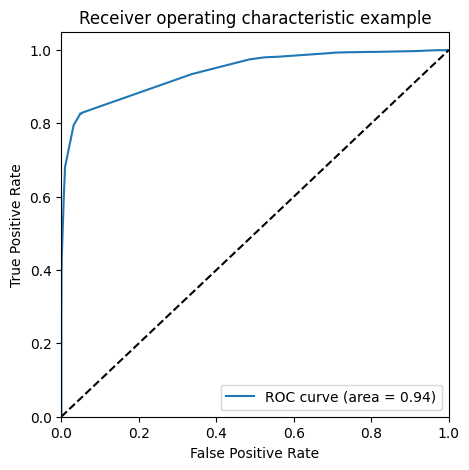

In [214]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**The ROC Curve should be a value close to 1. We are getting a good value of 0.94 indicating a good predictive model.**

### Finding Optimal Cutoff Point
**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:**

In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.085094,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.052118,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.720939,3274,1,1,1,1,1,1,1,1,1,0,0
3,0,0.005564,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.959290,1667,1,1,1,1,1,1,1,1,1,1,1


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cdf = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    TP = cm[1,1]  
    TN = cm[0,0] 
    FP = cm[0,1] 
    FN = cm[1,0]
    total=sum(sum(cm))
    accuracy = (TN+TP)/total
    speci = TN/float(TN+FP)
    sensi = TP/float(TP+FN)
    cdf.loc[i] =[ i ,accuracy,sensi,speci]
print(cdf)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.689804  0.974423  0.514941
0.2   0.2  0.902026  0.828931  0.946935
0.3   0.3  0.903782  0.826834  0.951056
0.4   0.4  0.903941  0.826415  0.951571
0.5   0.5  0.903303  0.823061  0.952602
0.6   0.6  0.903303  0.823061  0.952602
0.7   0.7  0.902346  0.795388  0.968058
0.8   0.8  0.873943  0.685954  0.989438
0.9   0.9  0.867720  0.667505  0.990726


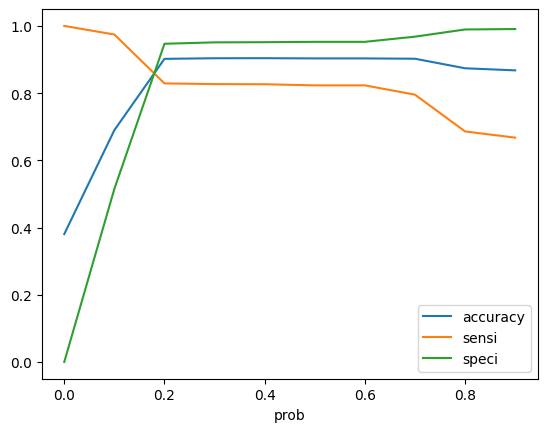

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cdf.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [218]:
#From the curve above, 0.2 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.085094,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.052118,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.720939,3274,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.005564,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.959290,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [219]:
#final predictionm data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.085094,9196,0,9
1,0,0.052118,4696,0,5
2,0,0.720939,3274,1,72
3,0,0.005564,2164,0,1
4,1,0.959290,1667,1,96


In [220]:
#Lets check with confusion matric for final train model data
cfm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
print(cfm)
TP = cfm[1,1]  
TN = cfm[0,0] 
FP = cfm[0,1] 
FN = cfm[1,0]
total=sum(sum(cfm))
accuracy = (TN+TP)/total
speci = TN/float(TN+FP)
sensi = TP/float(TP+FN)
Fpos = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv =TN / float(TN+ FN)
prec = TP / float(TP + FP)
recall = TP / float(TP + FN)

print('Total:', total, '\nAccuracy:', accuracy, '\nSpecificity:', speci, '\nSensitivity:', sensi,'\nFalse PositiveRate: ',Fpos,
      '\nPostive Predictive Valuew: ',ppv,'\nNegetive Predective Value: ',npv,'\nPrecision: ',prec,'\nRecall: ',recall)


[[3676  206]
 [ 408 1977]]
Total: 6267 
Accuracy: 0.9020264879527685 
Specificity: 0.9469345698093766 
Sensitivity: 0.8289308176100629 
False PositiveRate:  0.05306543019062339 
Postive Predictive Valuew:  0.9056344480073294 
Negetive Predective Value:  0.9000979431929481 
Precision:  0.9056344480073294 
Recall:  0.8289308176100629


In [221]:
#Lets Calculate the Precision and Recall score
from sklearn.metrics import precision_score, recall_score
ps=precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)
rs=recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
print('Precision Score: ',ps,'\nRecall Score: ',rs)

Precision Score:  0.9056344480073294 
Recall Score:  0.8289308176100629


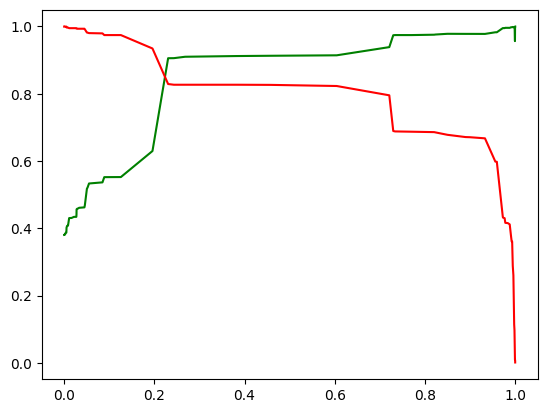

In [222]:
#Lets draw Precision Recall curve
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Train Dataset Observation
**So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:**
* Accuracy: 90.20%
* Specificity: 94.69% 
* Sensitivity: 82.89%
* False PositiveRate: 5.30% 
* Postive Predictive Value: 90.56% 
* Negetive Predective Value: 90% 
* Precision: 90.56% 
* Recall: 82.89%

## Making Predicition on Test Dataset

In [223]:
#scaling test set
N_columns=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[N_columns] = scaler.fit_transform(X_test[N_columns])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [224]:
#checking RFE supportive columns
X_test = X_test[R_columns]
X_test.head()

,Lead Origin_Lead Add Form,Specialization_Travel and Tourism,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Notable Activity_SMS Sent
7681,0,0,0,0,1,0,0,0,0,1,0,1
984,0,0,0,0,0,0,0,0,0,0,0,0
8135,0,0,0,0,0,0,0,0,0,1,0,1
6915,0,0,0,0,1,0,0,0,0,0,0,0
2712,0,0,0,0,0,1,0,0,0,0,0,0


In [225]:
#Lets make Prediction
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.052118
984     0.195950
8135    0.604313
6915    0.008697
2712    0.959290
244     0.008697
4698    0.195950
8287    0.045997
6791    0.959290
8970    0.027502
dtype: float64

In [226]:
# Converting y_pred to a dataframe which is an array
yp_df = pd.DataFrame(y_test_pred)
yp_df.head()

,0
7681,0.052118
984,0.195950
8135,0.604313
6915,0.008697
2712,0.959290


In [227]:
# Converting y_test to dataframe
yt_df = pd.DataFrame(y_test)
# Putting CustID to index
yt_df['Prospect ID'] = yt_df.index
yt_df.head()

,Converted,Prospect ID
7681,0,7681
984,0,984
8135,0,8135
6915,0,6915
2712,1,2712


In [228]:
# Removing index for both dataframes to append them side by side 
yp_df.reset_index(drop=True, inplace=True)
yt_df.reset_index(drop=True, inplace=True)
yp_final = pd.concat([yt_df, yp_df],axis=1)
yp_final.head()

,Converted,Prospect ID,0
0,0,7681,0.052118
1,0,984,0.195950
2,0,8135,0.604313
3,0,6915,0.008697
4,1,2712,0.959290


In [229]:
# Renaming and Rearranging the columns
yp_final= yp_final.rename(columns={ 0 : 'Converted Probability'})
yp_final = yp_final[['Prospect ID','Converted','Converted Probability']]
yp_final['Lead_Score'] = yp_final['Converted Probability'].map( lambda x: round(x*100))
yp_final['Final Predicted'] = yp_final['Converted Probability'].map(lambda x: 1 if x > 0.2 else 0)
yp_final.head()

,Prospect ID,Converted,Converted Probability,Lead_Score,Final Predicted
0,7681,0,0.052118,5,0
1,984,0,0.195950,20,0
2,8135,0,0.604313,60,1
3,6915,0,0.008697,1,0
4,2712,1,0.959290,96,1


In [230]:
# Let's check the overall accuracy.
(metrics.accuracy_score(yp_final.Converted, yp_final['Final Predicted']))*100

90.05956813104989

In [231]:
#Lets check with confusion matric for final test model data
tcfm = metrics.confusion_matrix(yp_final.Converted, yp_final['Final Predicted'])
print(cfm)
TP = tcfm[1,1]  
TN = tcfm[0,0] 
FP = tcfm[0,1] 
FN = tcfm[1,0]
total=sum(sum(tcfm))
accuracy = ((TN+TP)/total)*100
speci = (TN/float(TN+FP))*100
sensi = (TP/float(TP+FN))*100
Fpos = (FP/ float(TN+FP))*100
ppv = (TP / float(TP+FP))*100
npv =(TN / float(TN+ FN))*100
prec = (TP / float(TP + FP))*100
recall = (TP / float(TP + FN))*100

print('Total:', total, '\nAccuracy:', accuracy, '\nSpecificity:', speci, '\nSensitivity:', sensi,'\nFalse PositiveRate: ',Fpos,
      '\nPostive Predictive Valuew: ',ppv,'\nNegetive Predective Value: ',npv,'\nPrecision: ',prec,'\nRecall: ',recall)

[[3676  206]
 [ 408 1977]]
Total: 2686 
Accuracy: 90.05956813104989 
Specificity: 94.8090692124105 
Sensitivity: 82.17821782178217 
False PositiveRate:  5.190930787589499 
Postive Predictive Valuew:  90.51254089422028 
Negetive Predective Value:  89.82475975127191 
Precision:  90.51254089422028 
Recall:  82.17821782178217


### Test Set Observation
* Accuracy: 90.05%
* Specificity: 94.80%
* Sensitivity: 82.17%
* False PositiveRate:  5.19%
* Postive Predictive Valuew:  90.51%
* Negetive Predective Value:  89.82% 
* Precision:  90.51%
* Recall:  82.17%

In [232]:
#lETS consider the Leads which has the Lead score more than 75 is hot lead which most likely to be converted
H_leads=yp_final.loc[yp_final["Lead_Score"]>=75]
print(H_leads.shape)

(714, 5)


**As we can see that there is 714 Hot Leads are present which is likely to be converted**

In [233]:
#Lets Check which are all variable help the Leads to be converted 
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                     6.636725
Tags_Will revert after reading the email    4.571519
Lead Source_Welingak Website                3.902502
Last Notable Activity_SMS Sent              2.360928
Lead Origin_Lead Add Form                   1.241063
Lead Source_Direct Traffic                 -0.525657
const                                      -1.411804
Specialization_Travel and Tourism          -1.426579
Last Activity_Olark Chat Conversation      -1.620279
Last Activity_Email Bounced                -1.640969
Tags_Interested in other courses           -2.153795
Tags_Ringing                               -3.324193
Tags_switched off                          -3.880916
dtype: float64

**We can see that if the Lead is from Tags_Closed by Horizzon variables then it mostly to be converted and the Leads which are tagged as switched off is likely to be not converted**

## <u> Final Observation Based on this Model</u>

### <u>Train Dataset</u>
* Accuracy: 90.20%
* Specificity: 94.69% 
* Sensitivity: 82.89%
* False PositiveRate: 5.30% 
* Postive Predictive Value: 90.56% 
* Negetive Predective Value: 90% 
* Precision: 90.56% 
* Recall: 82.89%

### <u>Test Dataset</u>
* Accuracy: 90.05%
* Specificity: 94.80%
* Sensitivity: 82.17%
* False PositiveRate:  5.19%
* Postive Predictive Valuew:  90.51%
* Negetive Predective Value:  89.82% 
* Precision:  90.51%
* Recall:  82.17%

**The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model**